# Portuguese banking institution Dataset

# Prepare a complete data analysis report and Create a predictive model which will help the bank marketing team to know which customer will buy the product.

In [1]:
# To Load the python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
customer_details = pd.read_csv('bank-additional-full.csv', sep=';')

## basic checks

In [3]:
customer_details.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
customer_details.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
customer_details.describe(include ="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [6]:
customer_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
customer_details.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
customer_details.shape

(41188, 21)

In [9]:
customer_details.duplicated().any()

np.True_

# introduction 
# This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. 



# Attribute Information:
# Input variables:
### 1 - age (numeric)
### 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
### 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
### 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
### 5 - default: has credit in default? (categorical: 'no','yes','unknown')
### 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
### 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
### 8 - contact: contact communication type (categorical: 'cellular','telephone')
### 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
### 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
### 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
### 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
### 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
### 14 - previous: number of contacts performed before this campaign and for this client (numeric)
### 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
### 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
### 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
### 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
### 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
### 20 - nr.employed: number of employees - quarterly indicator (numeric)
# Output variable (desired target):
### 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


### visualizing data

In [10]:
# univariate analysis
customer_details.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

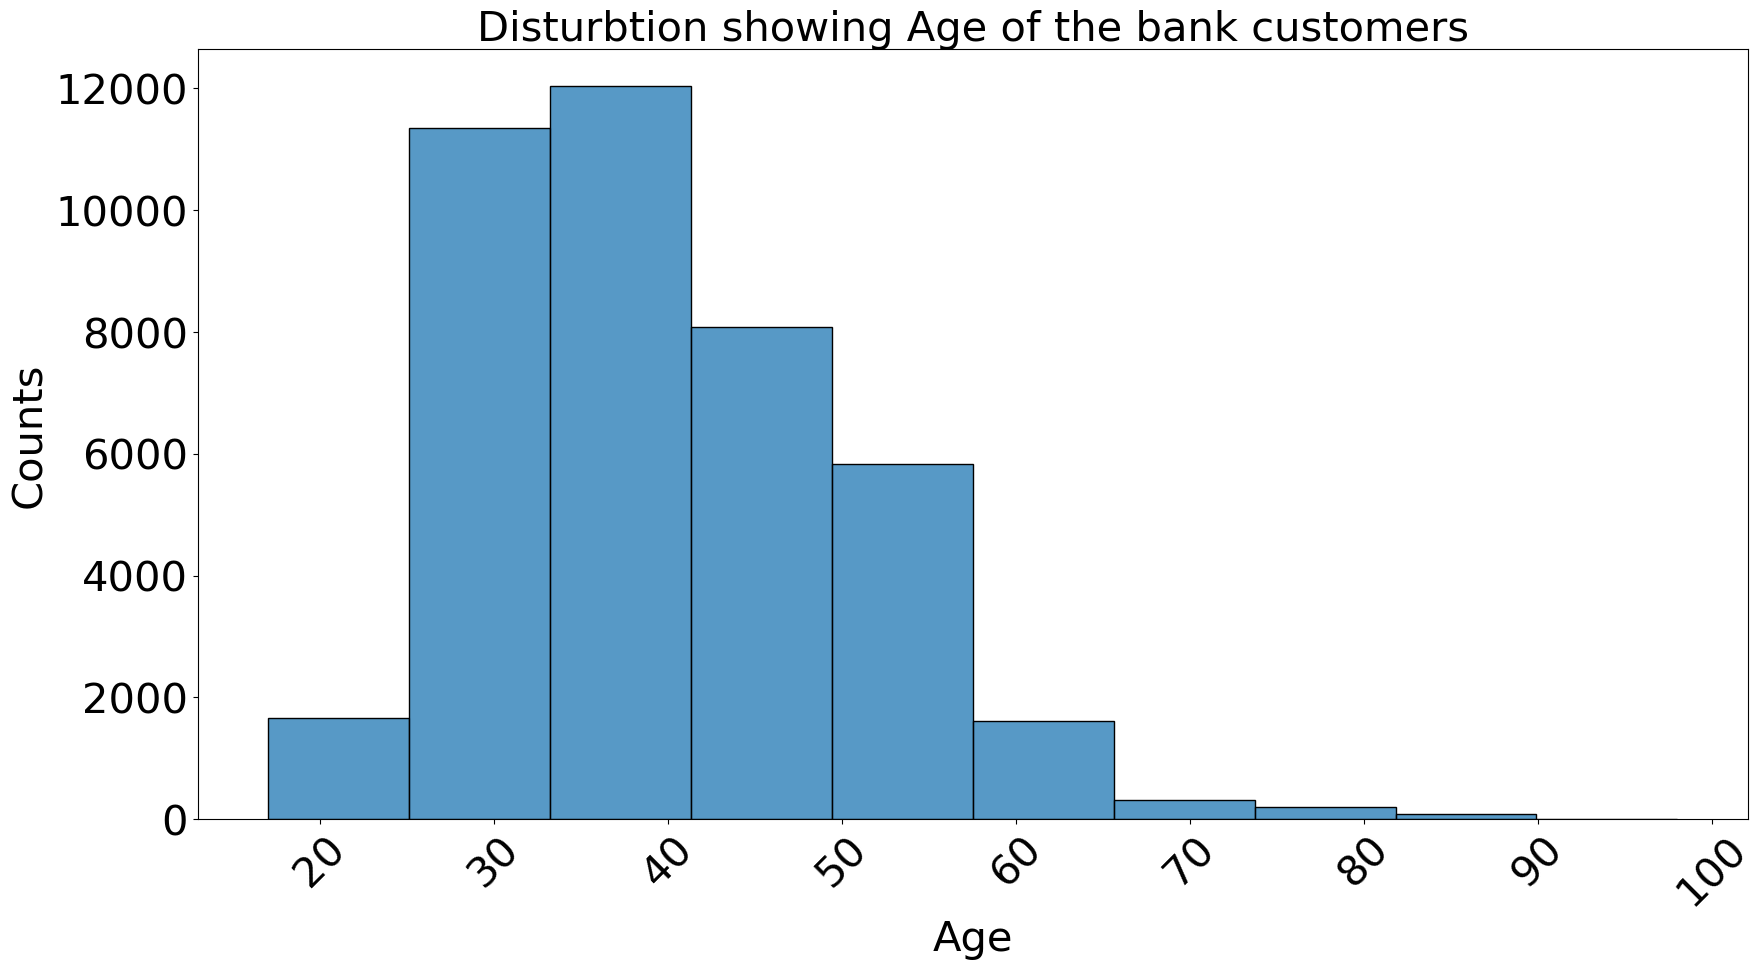

In [11]:
plt.figure(figsize=(20,10))
sns.histplot(customer_details['age'],bins=10)
plt.title("Disturbtion showing Age of the bank customers",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("Age",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=30)
plt.show()

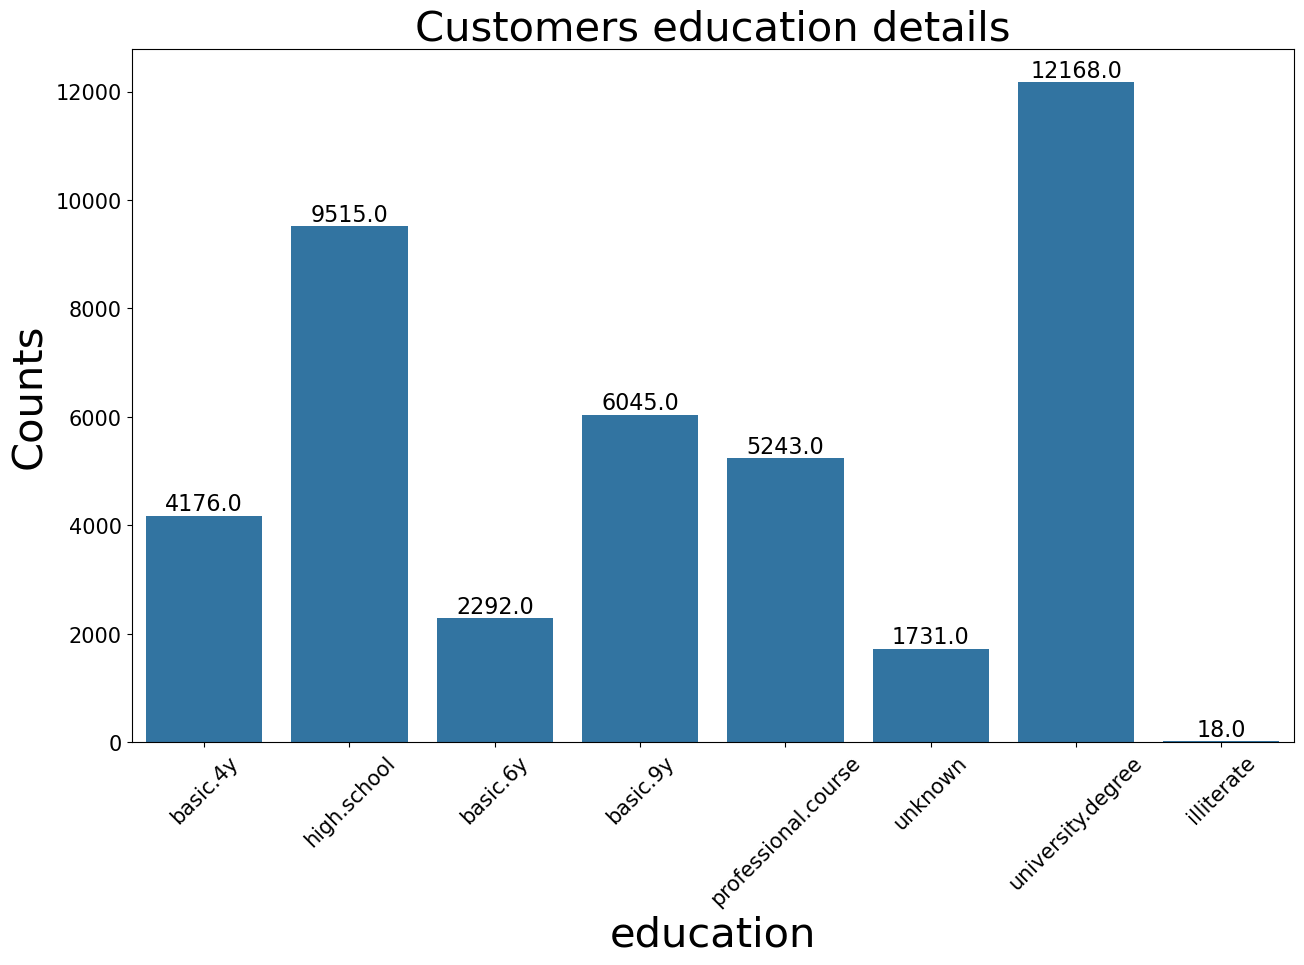

In [12]:
plt.figure(figsize=(15,9))
ax=sns.countplot(x='education', data=customer_details)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color='black', fontsize=16)
plt.title("Customers education details",size=30)
plt.xticks(rotation=45,size=15)
plt.xlabel("education",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

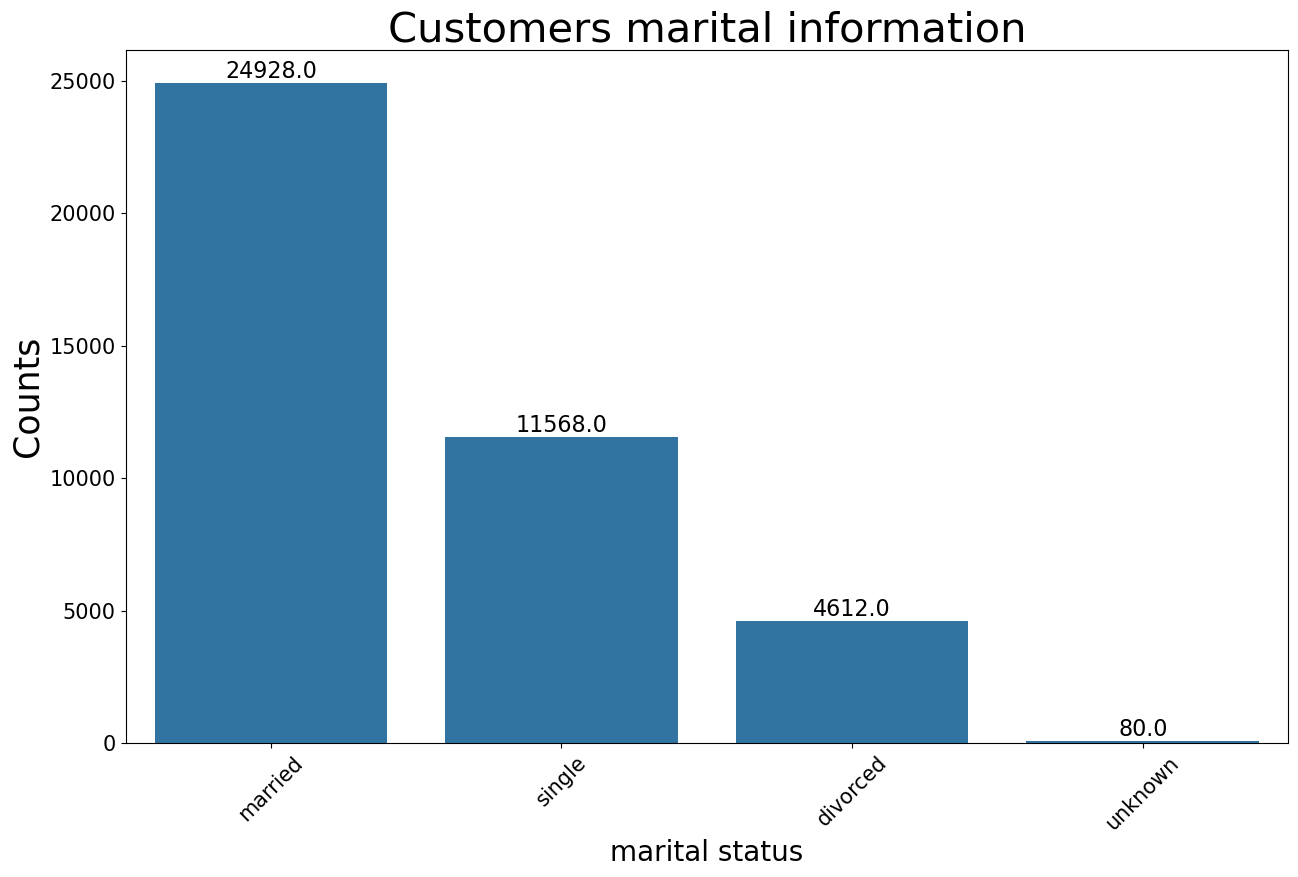

In [13]:
plt.figure(figsize=(15,9))
ax=sns.countplot(x='marital', data=customer_details)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color='black', fontsize=16)
plt.title("Customers marital information",size=30)
plt.xticks(rotation=45,size=15)
plt.xlabel("marital status",size=20)
plt.ylabel("Counts",size=25)
plt.yticks(size=15)
plt.show()

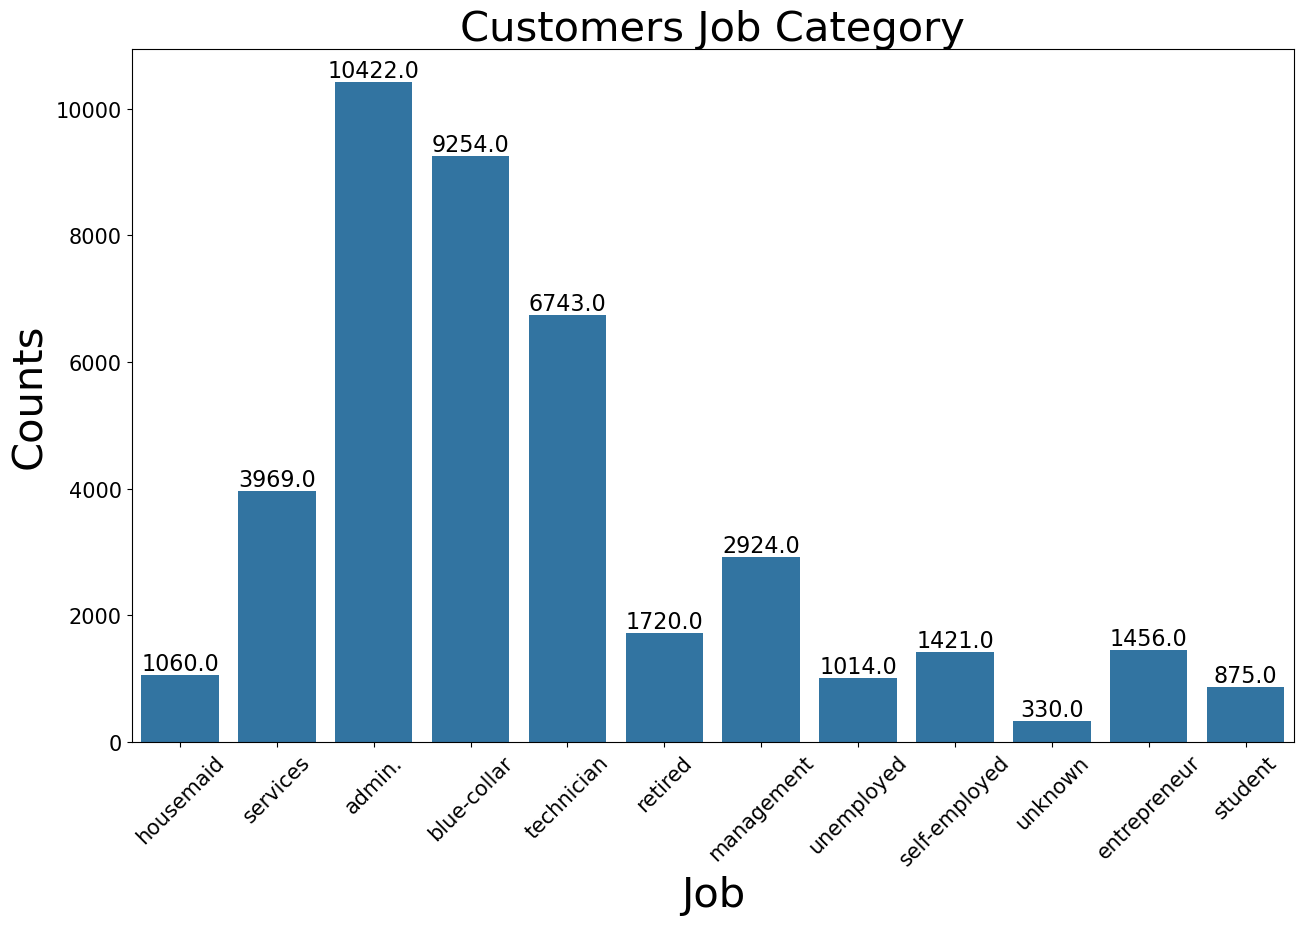

In [14]:
plt.figure(figsize=(15,9))
ax=sns.countplot(x='job', data=customer_details)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color='black', fontsize=16)
plt.title("Customers Job Category",size=30)
plt.xticks(rotation=45,size=15)
plt.xlabel("Job",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

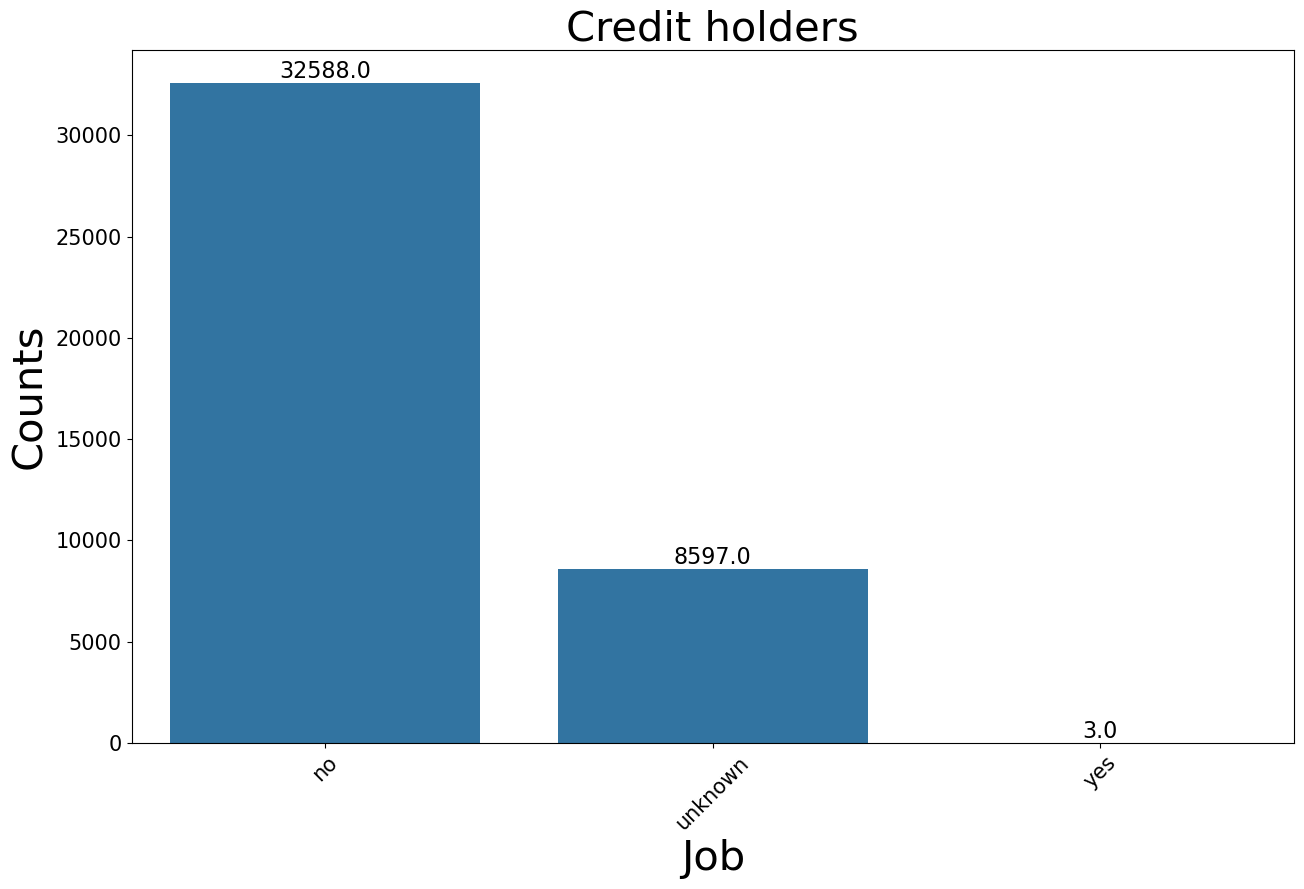

In [15]:
plt.figure(figsize=(15,9))
ax=sns.countplot(x='default', data=customer_details)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color='black', fontsize=16)
plt.title("Credit holders",size=30)
plt.xticks(rotation=45,size=15)
plt.xlabel("Job",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

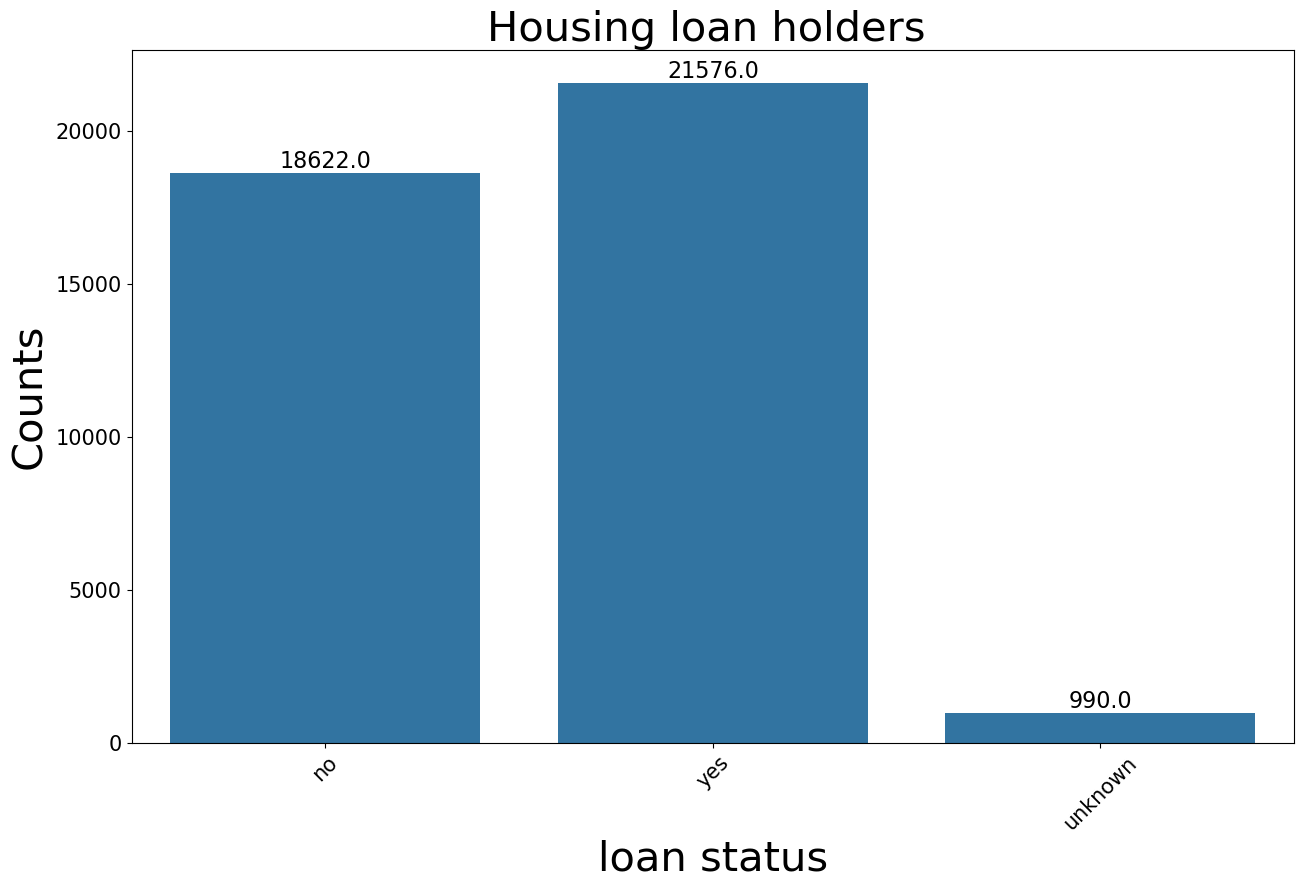

In [16]:
plt.figure(figsize=(15,9))
ax=sns.countplot(x='housing', data=customer_details)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color='black', fontsize=16)
plt.title("Housing loan holders ",size=30)
plt.xticks(rotation=45,size=15)
plt.xlabel("loan status",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

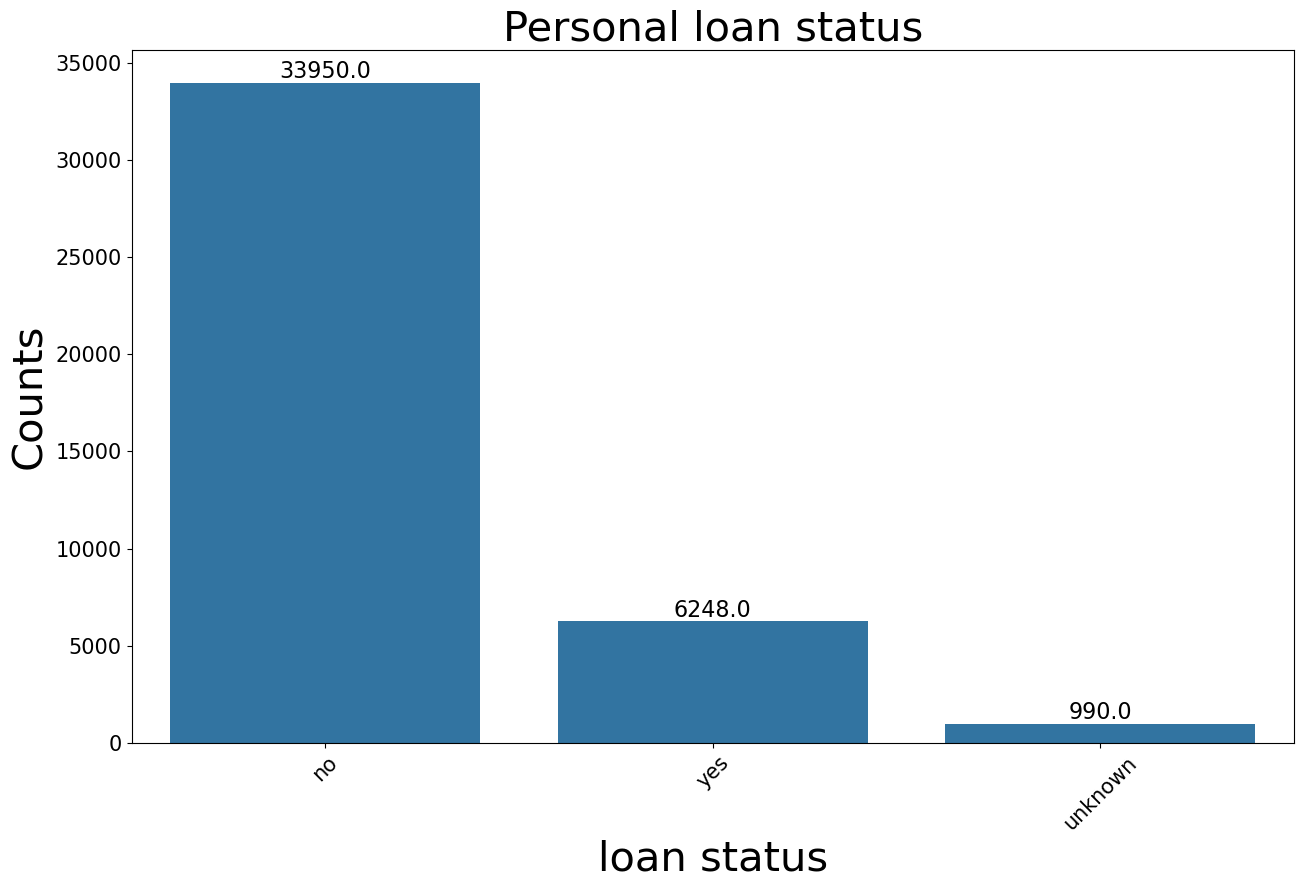

In [17]:
plt.figure(figsize=(15,9))
ax=sns.countplot(x='loan', data=customer_details)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color='black', fontsize=16)
plt.title("Personal loan status",size=30)
plt.xticks(rotation=45,size=15)
plt.xlabel("loan status",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

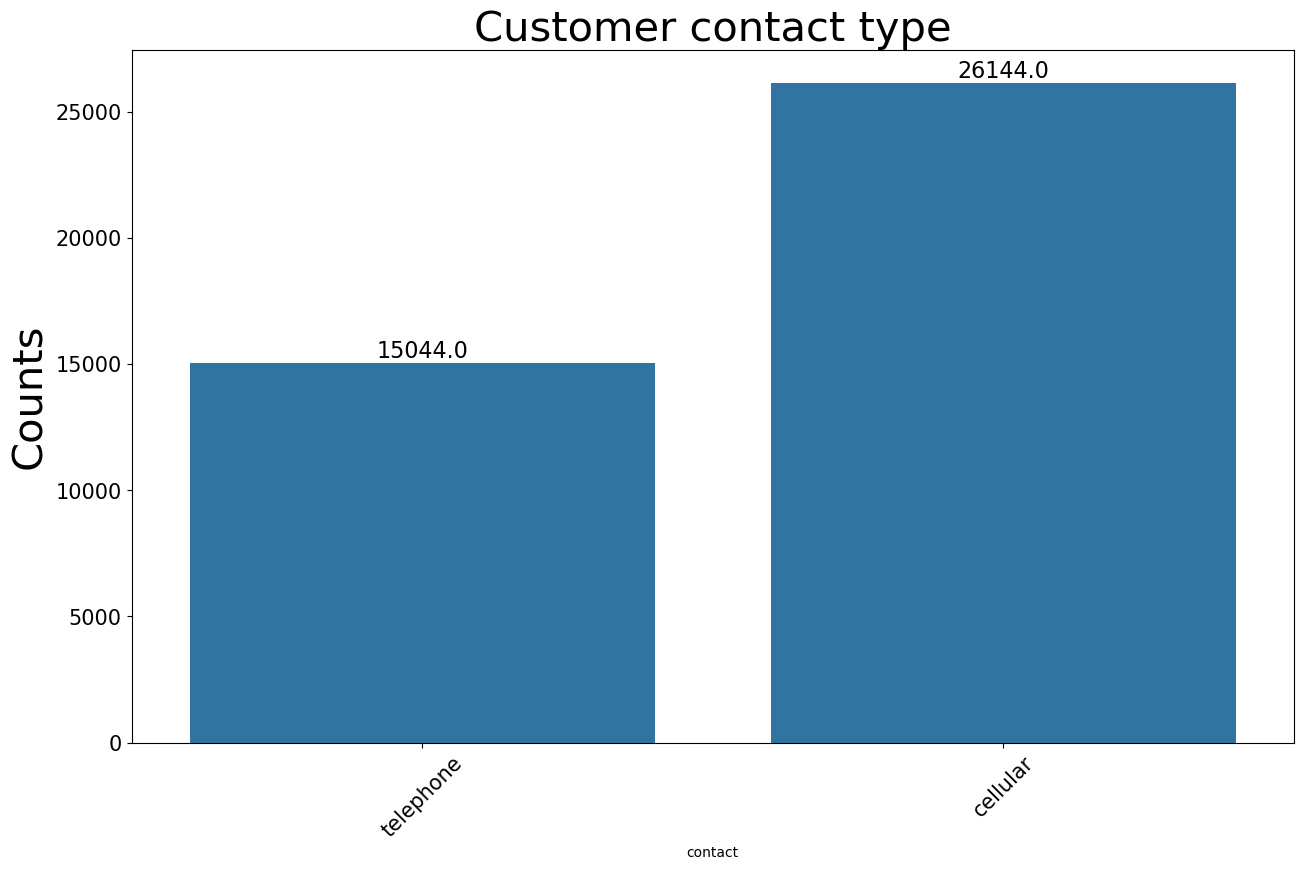

In [18]:
plt.figure(figsize=(15,9))
ax=sns.countplot(x='contact', data=customer_details)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color='black', fontsize=16)
plt.title("Customer contact type",size=30)
plt.xticks(rotation=45,size=15)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

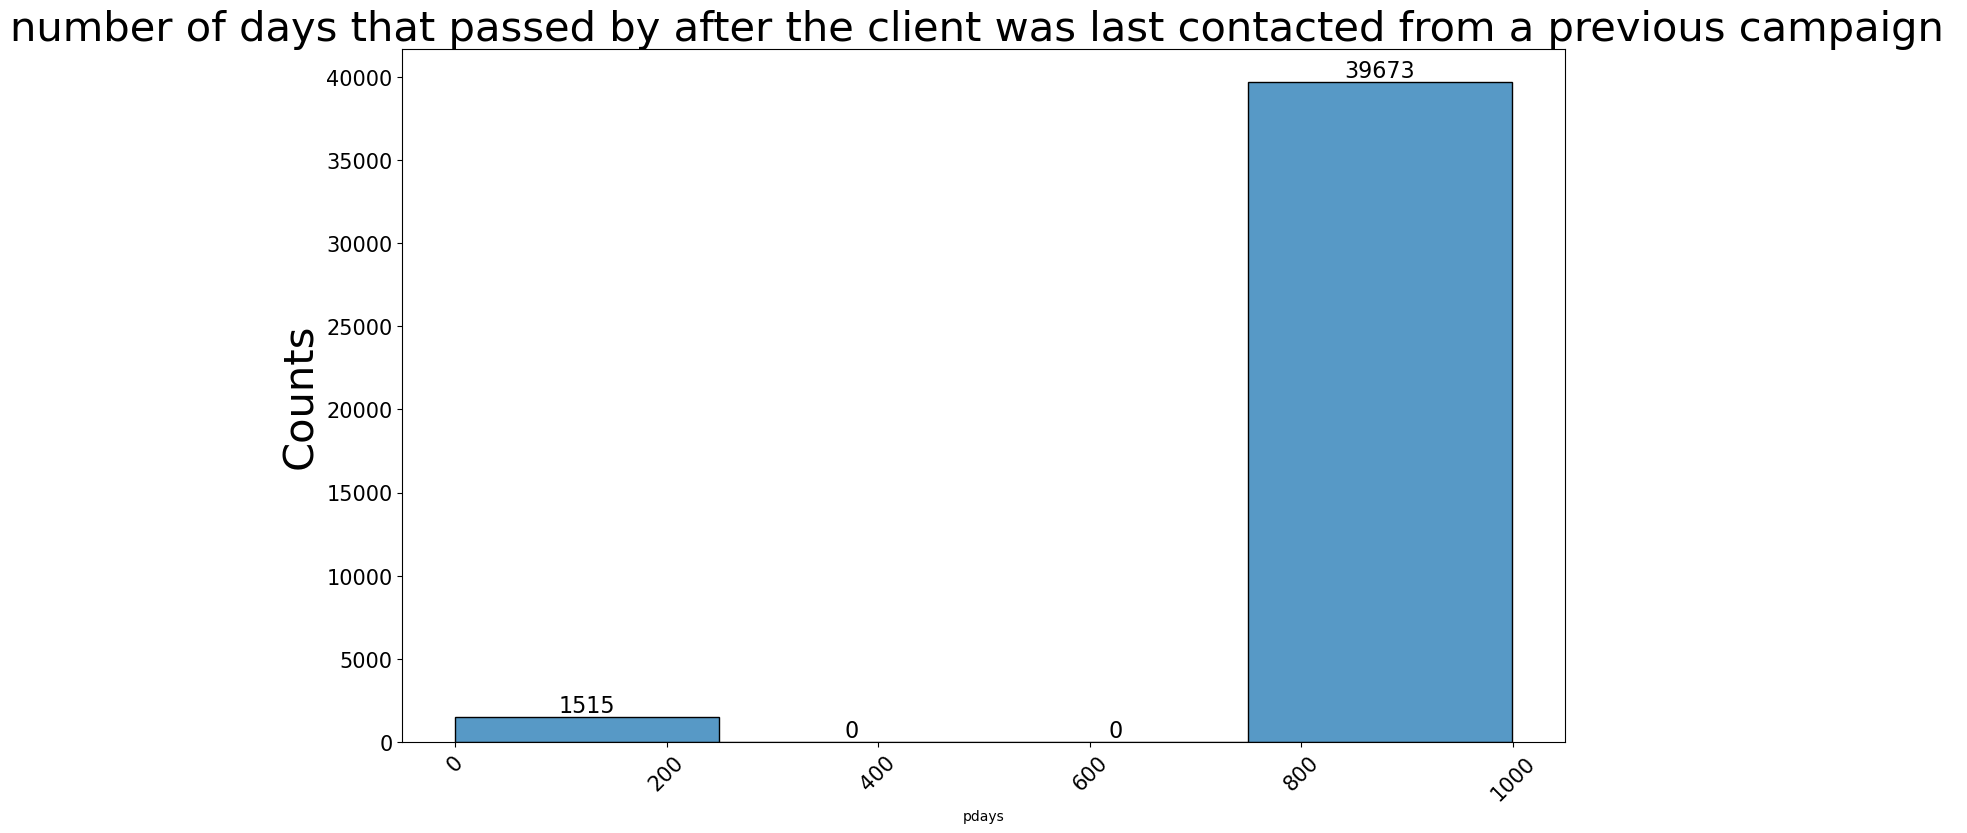

In [19]:
plt.figure(figsize=(15,9))
ax=sns.histplot(x='pdays', data=customer_details,bins= 4)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color='black', fontsize=16)
plt.title("number of days that passed by after the client was last contacted from a previous campaign ",size=30)
plt.xticks(rotation=45,size=15)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

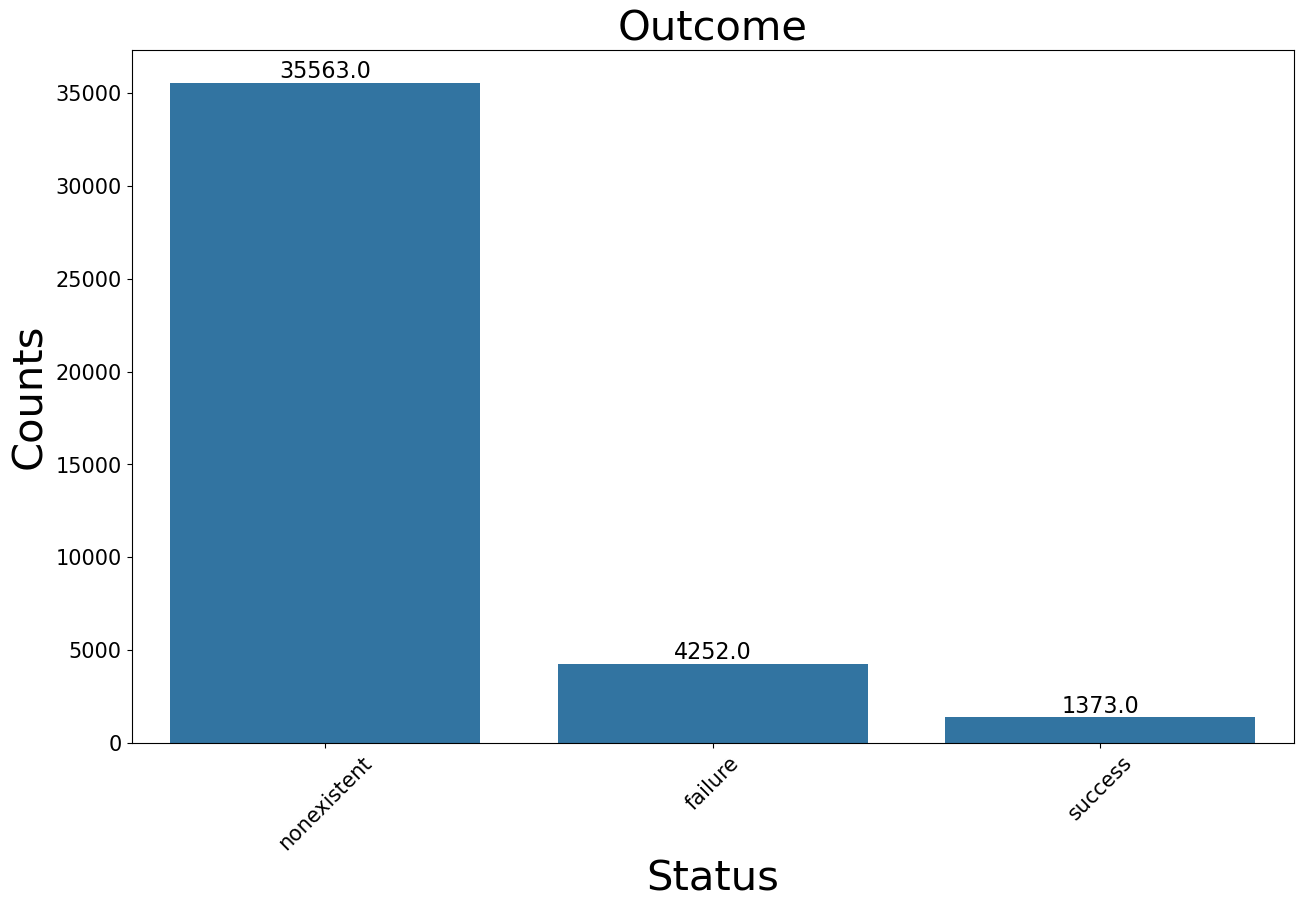

In [20]:
plt.figure(figsize=(15,9))
ax=sns.countplot(x='poutcome', data=customer_details)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color='black', fontsize=16)
plt.title("Outcome",size=30)
plt.xticks(rotation=45,size=15)
plt.xlabel("Status",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

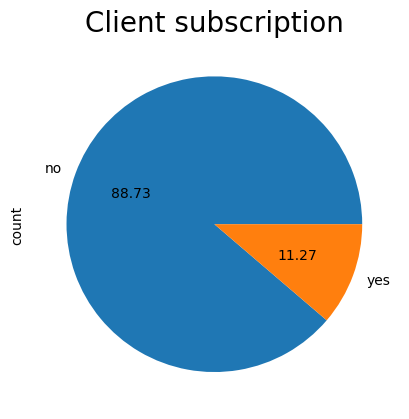

In [21]:
customer_details["y"].value_counts().plot.pie(autopct="%.2f")
plt.title("Client subscription", size= 20)
plt.show()

# BI-variate analysis

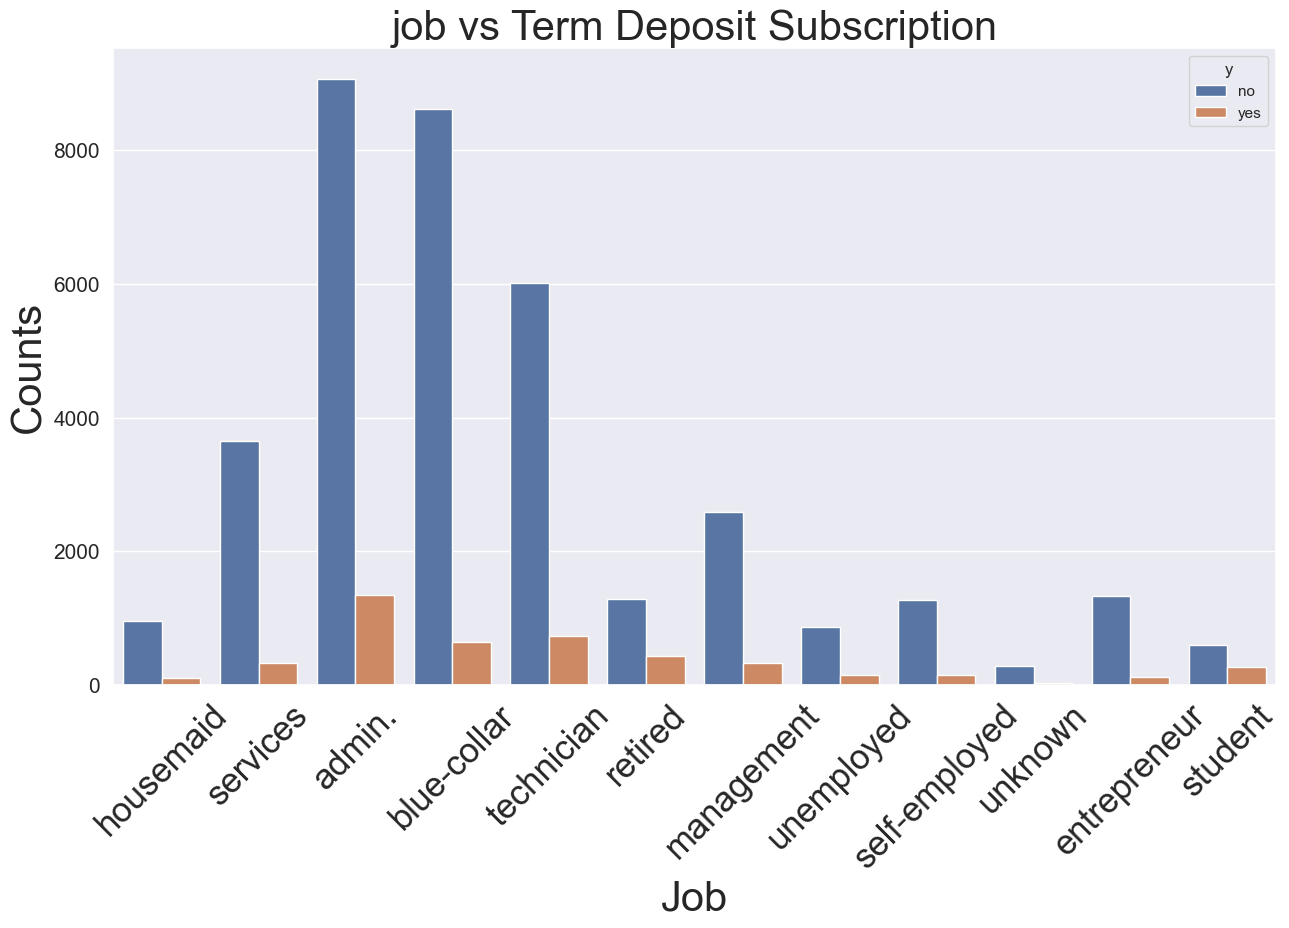

In [22]:
sns.set(rc={'figure.figsize':(15,8.27)})

sns.countplot(x='job',hue="y" ,data = customer_details)

plt.title("job vs Term Deposit Subscription",size=30)
plt.xticks(rotation=45,size=25)
plt.xlabel("Job",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

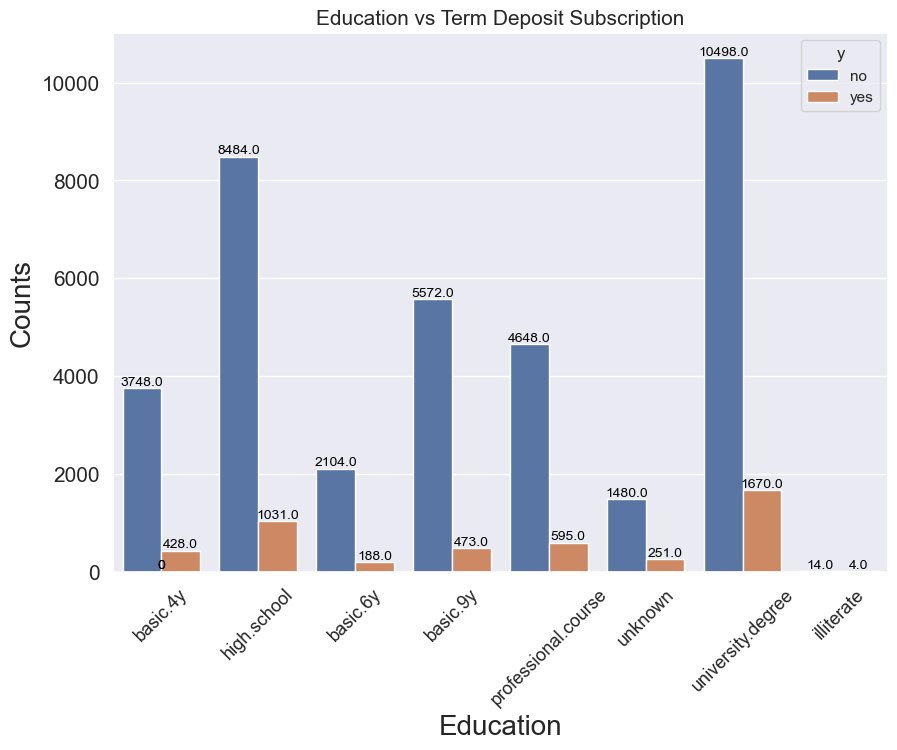

In [23]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='education',hue="y", data=customer_details)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color='black', fontsize=10)

plt.title('Education vs Term Deposit Subscription',size=15)
plt.xticks(rotation=45,size=13)
plt.xlabel("Education",size=20)
plt.ylabel("Counts",size=20)
plt.yticks(size=15)
plt.show()


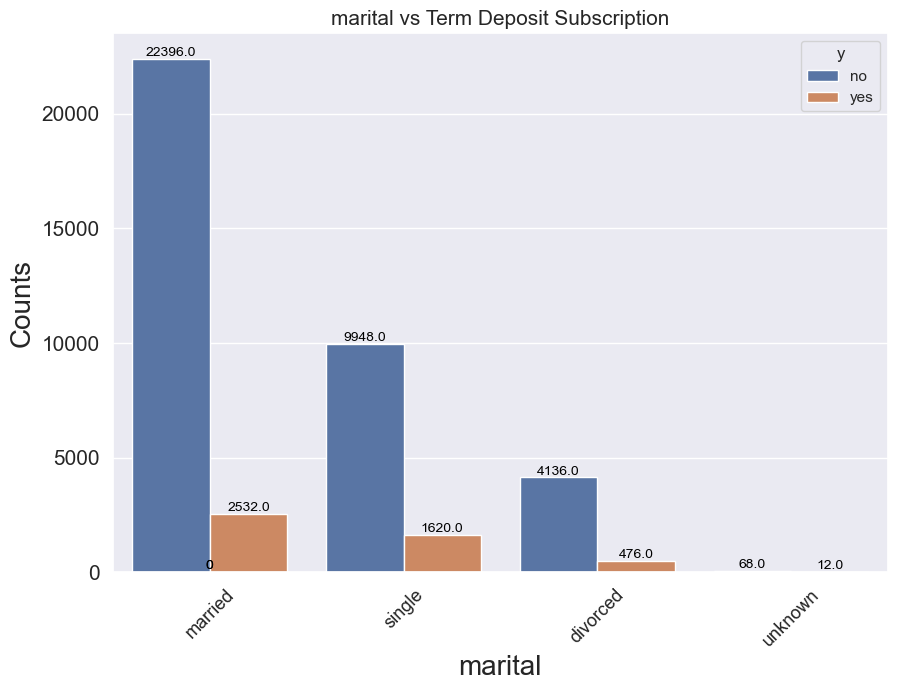

In [24]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='marital',hue="y", data=customer_details)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color='black', fontsize=10)

plt.title('marital vs Term Deposit Subscription',size=15)
plt.xticks(rotation=45,size=13)
plt.xlabel("marital",size=20)
plt.ylabel("Counts",size=20)
plt.yticks(size=15)
plt.show()


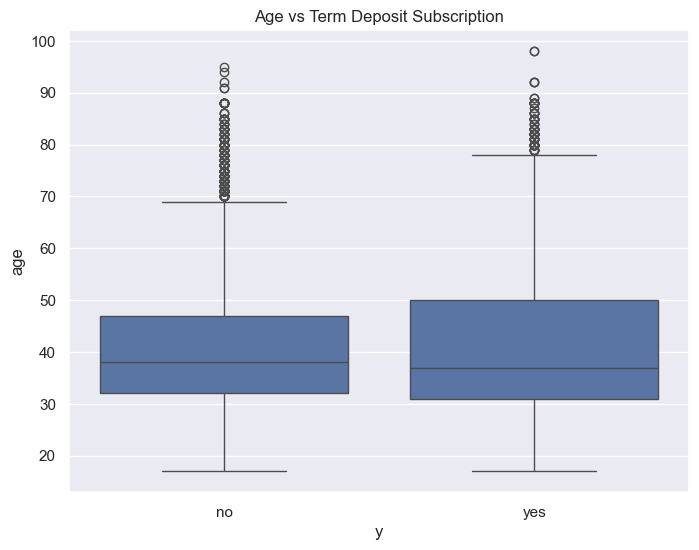

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x='y', y='age', data=customer_details)
plt.title('Age vs Term Deposit Subscription')
plt.show()


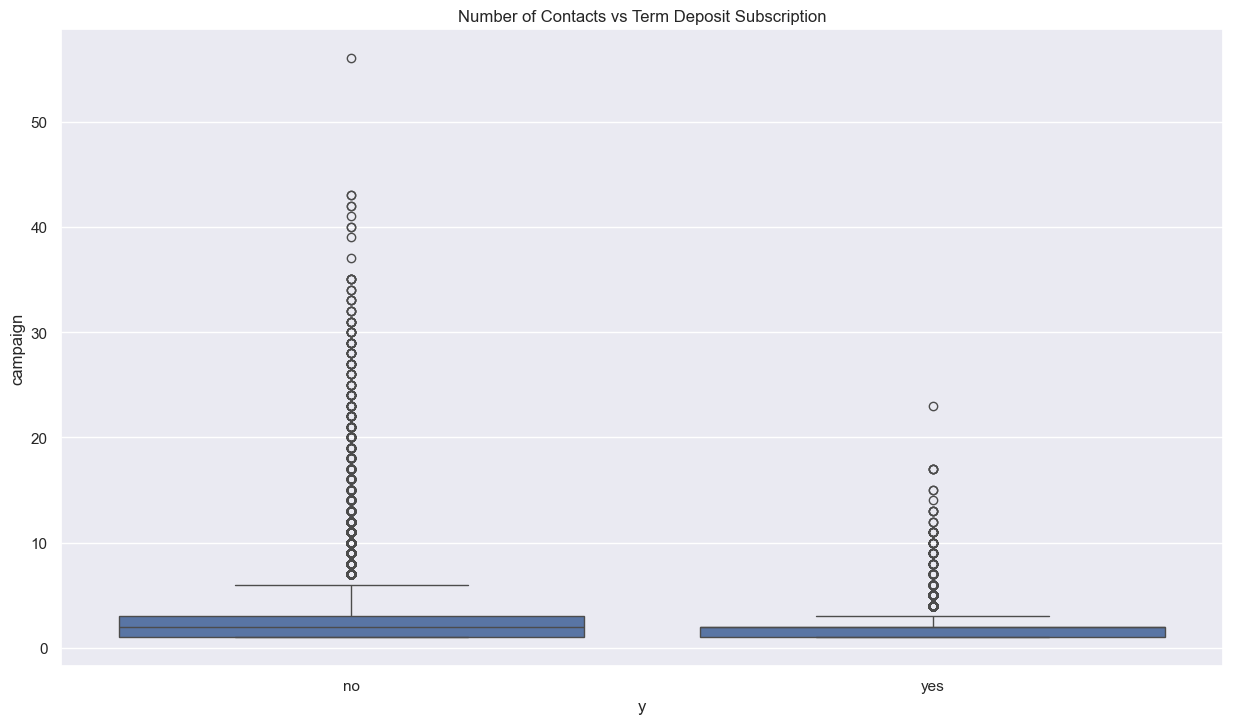

In [26]:
sns.boxplot(x='y', y='campaign', data=customer_details)
plt.title('Number of Contacts vs Term Deposit Subscription')
plt.show()


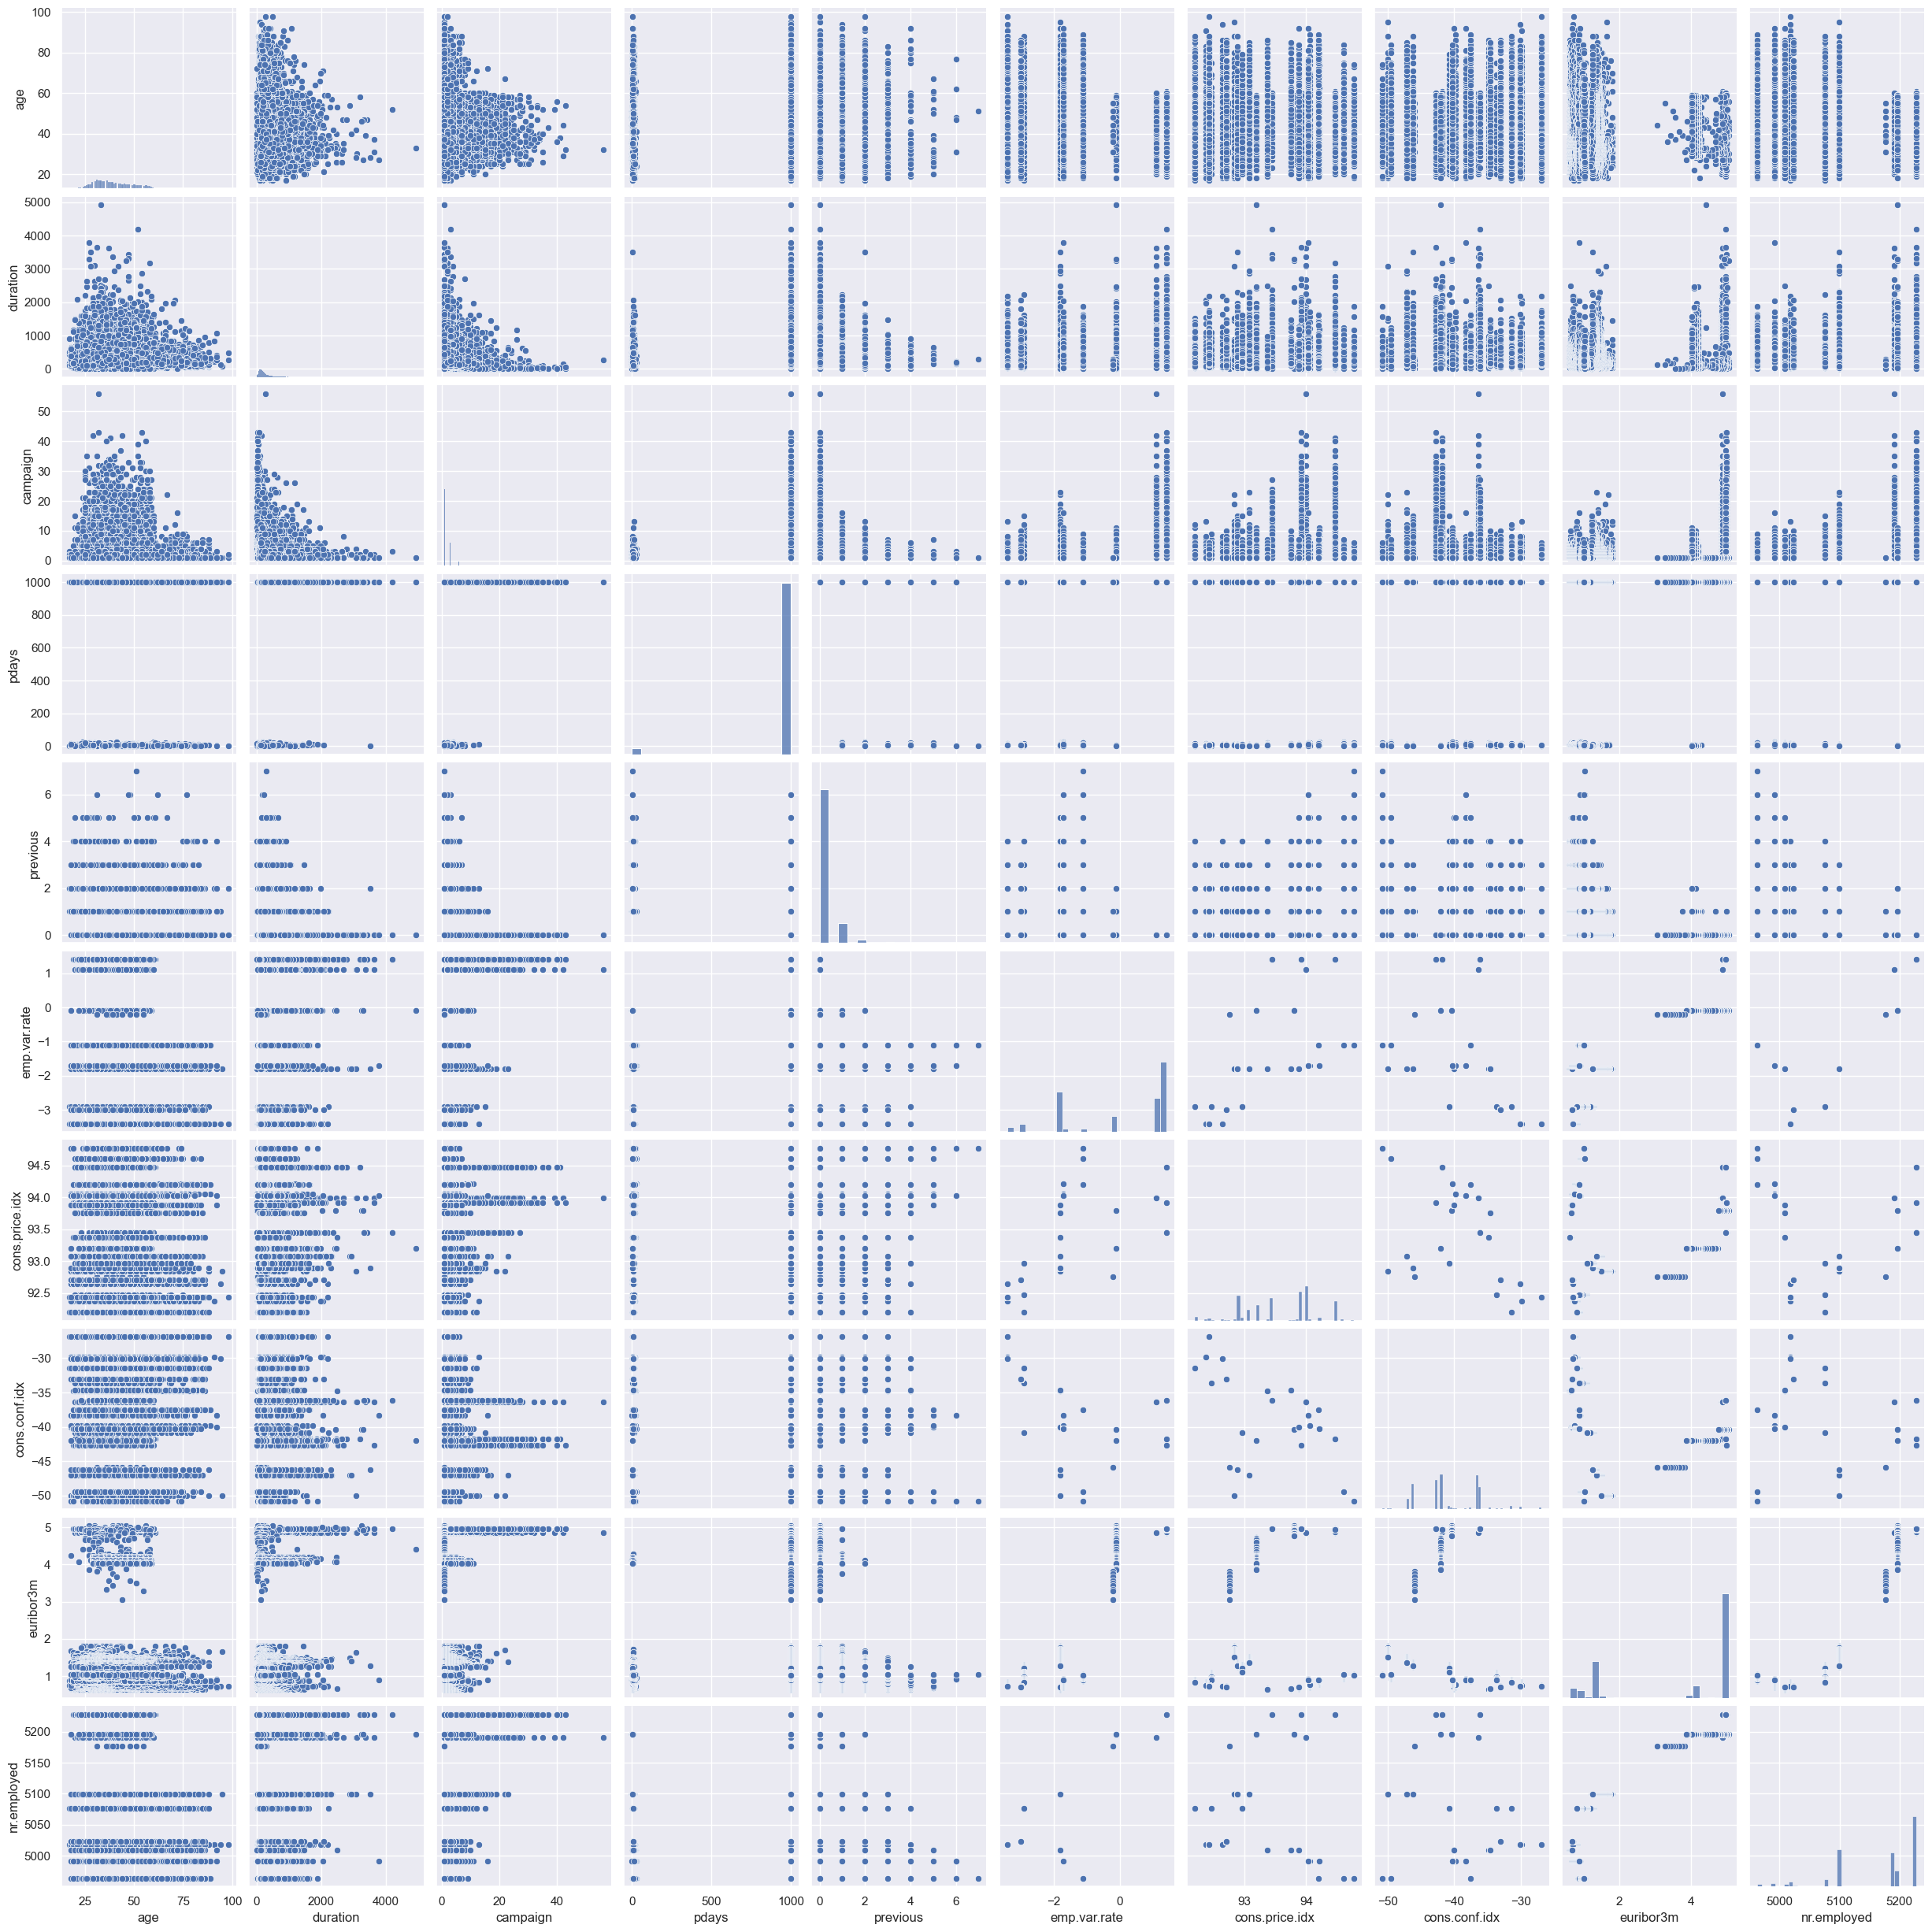

In [27]:
sns.pairplot(customer_details)

# checking the correlation within the features

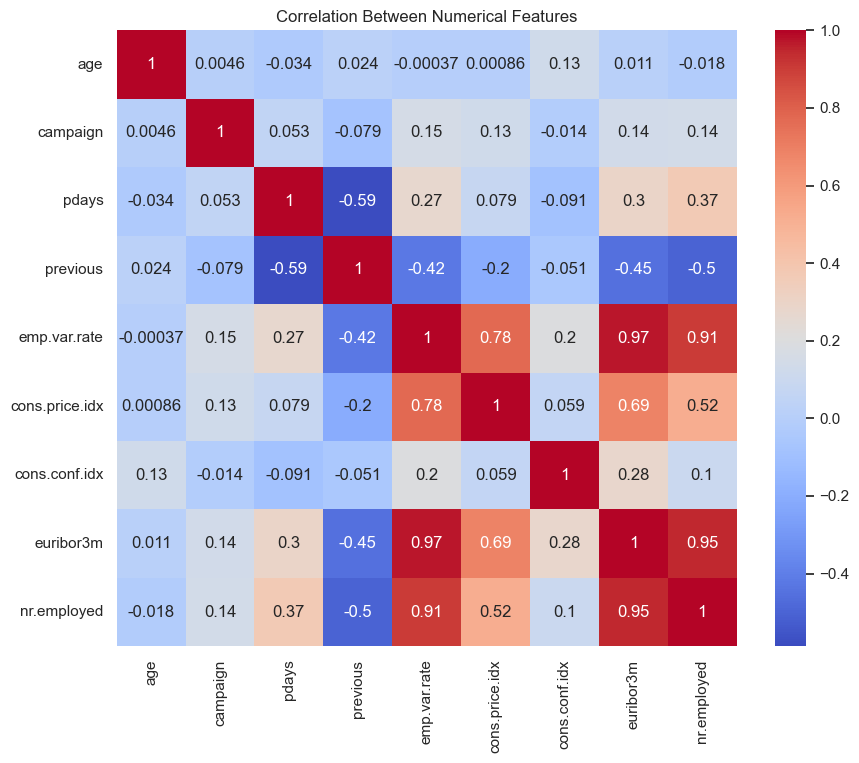

In [28]:
numerical_cols = customer_details.select_dtypes(include=['int64', 'float64']).drop(columns=['duration'])  # exclude 'duration'
plt.figure(figsize=(10,8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()


In [29]:
numerical_cols

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [30]:
for col in customer_details.select_dtypes(include='object'):
    if 'unknown' in customer_details[col].unique():
        print(f"{col} --> 'unknown' count: {customer_details[col].value_counts()['unknown']}")


job --> 'unknown' count: 330
marital --> 'unknown' count: 80
education --> 'unknown' count: 1731
default --> 'unknown' count: 8597
housing --> 'unknown' count: 990
loan --> 'unknown' count: 990


In [31]:
customer_details.job.value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [32]:
customer_details.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [33]:
# Before correlation
print("Missing values:\n", customer_details.isnull().sum())

# Or treat 'unknown' as missing
print("Unknown values in categorical columns:")
for col in customer_details.select_dtypes(include='object'):
    if 'unknown' in customer_details[col].unique():
        print(f"{col}: {(customer_details[col] == 'unknown').sum()} unknowns")


Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Unknown values in categorical columns:
job: 330 unknowns
marital: 80 unknowns
education: 1731 unknowns
default: 8597 unknowns
housing: 990 unknowns
loan: 990 unknowns


In [34]:
customer_details['education'] = customer_details['education'].replace('unknown', customer_details['education'].mode()[0])
customer_details['job'] = customer_details['job'].replace('unknown', customer_details['job'].mode()[0])
customer_details['marital'] = customer_details['marital'].replace('unknown', customer_details['marital'].mode()[0])


In [35]:
print("Missing values:\n", customer_details.isnull().sum())
print("Unknown values in categorical columns:")
for col in customer_details.select_dtypes(include='object'):
    if 'unknown' in customer_details[col].unique():
        print(f"{col}: {(customer_details[col] == 'unknown').sum()} unknowns")


Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Unknown values in categorical columns:
default: 8597 unknowns
housing: 990 unknowns
loan: 990 unknowns


In [36]:
# Optionally: keep 'unknown' in 'default', 'housing', 'loan'
# OR group it under 'no_info'
customer_details['default'] = customer_details['default'].replace('unknown', 'no_info')
customer_details['housing'] = customer_details['housing'].replace('unknown', 'no_info')
customer_details['loan'] = customer_details['loan'].replace('unknown', 'no_info')


In [37]:
print("Missing values:\n", customer_details.isnull().sum())
print("Unknown values in categorical columns:")
for col in customer_details.select_dtypes(include='object'):
    if 'unknown' in customer_details[col].unique():
        print(f"{col}: {(customer_details[col] == 'unknown').sum()} unknowns")


Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Unknown values in categorical columns:


# correlatiorn after checking the missing values

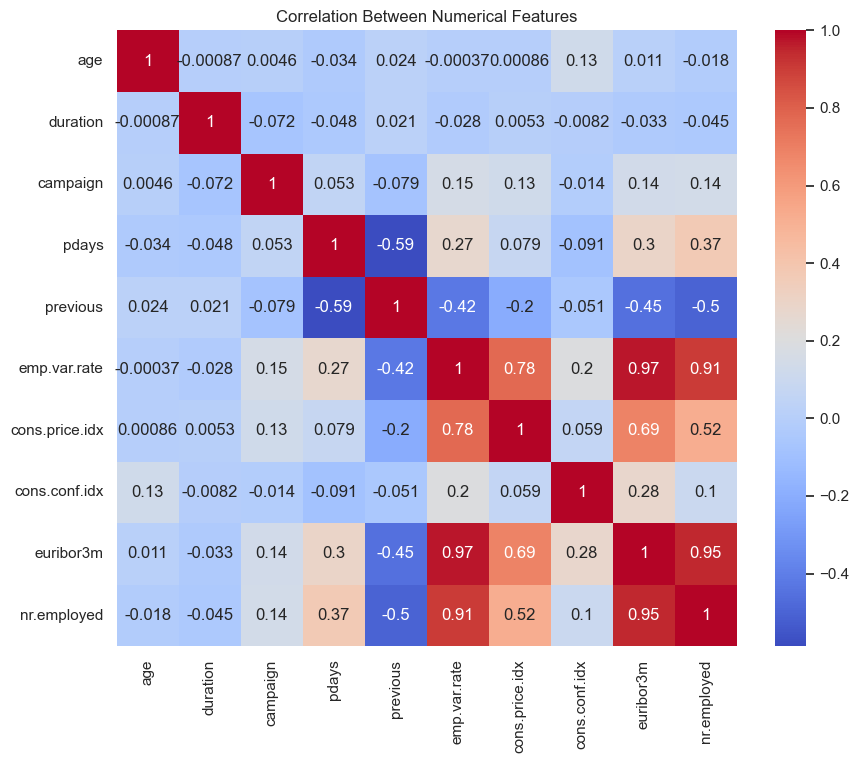

In [38]:
numerical_cols = customer_details.select_dtypes(include=['int64', 'float64'])  # exclude 'duration'
plt.figure(figsize=(10,8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()


In [39]:
customer_details.drop(['duration', 'euribor3m','nr.employed','emp.var.rate'], axis=1, inplace=True)


In [40]:
customer_details

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,no
1,57,services,married,high.school,no_info,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,94.767,-50.8,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,94.767,-50.8,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,94.767,-50.8,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,94.767,-50.8,yes


In [41]:
customer_details.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [42]:
customer_details_encoded = pd.get_dummies(customer_details, drop_first=True)


In [43]:
customer_details_encoded

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,93.994,-36.4,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
1,57,1,999,0,93.994,-36.4,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,37,1,999,0,93.994,-36.4,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,40,1,999,0,93.994,-36.4,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,56,1,999,0,93.994,-36.4,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,94.767,-50.8,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
41184,46,1,999,0,94.767,-50.8,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
41185,56,2,999,0,94.767,-50.8,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
41186,44,1,999,0,94.767,-50.8,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True


# Train-Test Split

In [44]:
#X = df_encoded.drop('y', axis=1)
#y = df_encoded['y']
x=customer_details_encoded.drop('y_yes',axis=1)
y=customer_details_encoded['y_yes']

In [45]:
x

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,93.994,-36.4,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False
1,57,1,999,0,93.994,-36.4,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
2,37,1,999,0,93.994,-36.4,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,40,1,999,0,93.994,-36.4,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
4,56,1,999,0,93.994,-36.4,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,94.767,-50.8,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
41184,46,1,999,0,94.767,-50.8,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
41185,56,2,999,0,94.767,-50.8,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
41186,44,1,999,0,94.767,-50.8,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [46]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
41183     True
41184    False
41185    False
41186     True
41187    False
Name: y_yes, Length: 41188, dtype: bool

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [48]:
X_train

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
25611,49,4,999,0,93.200,-42.0,True,False,False,False,...,False,True,False,False,False,False,False,True,True,False
26010,37,2,999,1,93.200,-42.0,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
40194,78,1,999,0,94.215,-40.3,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
297,36,2,999,0,93.994,-36.4,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
36344,59,2,999,0,92.963,-40.8,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40205,28,1,999,0,94.215,-40.3,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
27316,52,1,999,1,93.200,-42.0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
14392,54,4,999,0,93.918,-42.7,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
7494,29,1,999,0,93.994,-36.4,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [49]:
X_test

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
14455,32,5,999,0,93.918,-42.7,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
36380,37,1,999,0,92.963,-40.8,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
40076,73,2,999,0,94.215,-40.3,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
10778,44,2,999,0,94.465,-41.8,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
27939,28,2,999,0,92.843,-50.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33359,48,1,999,0,92.893,-46.2,False,False,False,True,...,True,False,False,False,False,False,True,False,True,False
34998,30,1,999,0,92.893,-46.2,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
39861,33,1,999,1,94.055,-39.8,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3920,44,7,999,0,93.994,-36.4,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False


In [50]:
Y_train

25611    False
26010    False
40194     True
297      False
36344    False
         ...  
40205    False
27316    False
14392    False
7494     False
10747    False
Name: y_yes, Length: 32950, dtype: bool

In [51]:
Y_test

14455    False
36380    False
40076    False
10778    False
27939    False
         ...  
33359     True
34998    False
39861    False
3920     False
33395    False
Name: y_yes, Length: 8238, dtype: bool

# logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # for ROC-AUC



In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Evaluation metrics
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, y_prob))

Accuracy: 0.8983976693372178
Precision: 0.6654545454545454
Recall: 0.19719827586206898
F1 Score: 0.30423940149625933
ROC-AUC Score: 0.7703253248974008


# random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 3: Make predictions
y_pred_rf = rf.predict(X_test)

# Step 4: Evaluate model
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1]))


# xgboost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, scale_pos_weight=7)  # tweak this weight
xgb.fit(X_train, Y_train)

y_pred_xgb = xgb.predict(X_test)
print(classification_report(Y_test, y_pred_xgb))


In [ ]:
from sklearn.metrics import roc_curve, auc

# If you already have y_probs from XGBoost
fpr, tpr, _ = roc_curve(Y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGBoost ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()


🔍Key Improvements with XGBoost
Metric	Before (LogReg)	After (XGBoost)
Recall (True)	~19–27%	59% 
F1-Score (True)	~30%	48% 
Accuracy	~89–90%	85% (expected)
ROC-AUC	~0.76–0.77	Likely 0.80+

This shows that XGBoost + SMOTE is clearly helping you capture more positive cases, even with a slight dip in overall accuracy — which is totally acceptable in imbalanced classification.

 # Model Performance Report: Term Deposit Prediction

# Objective:
## To predict which customers are likely to subscribe to a term deposit, enabling the bank's marketing team to
## target customers effectively.
## Models Evaluated:
# 1. Logistic Regression
# 2. Random Forest Classifier
# 3. XGBoost Classifier
# 4. XGBoost + SMOTE
## Performance Metrics Considered:- Accuracy- Precision- Recall- F1-Score- ROC-AUC Score
![image.png](attachment:image.png)

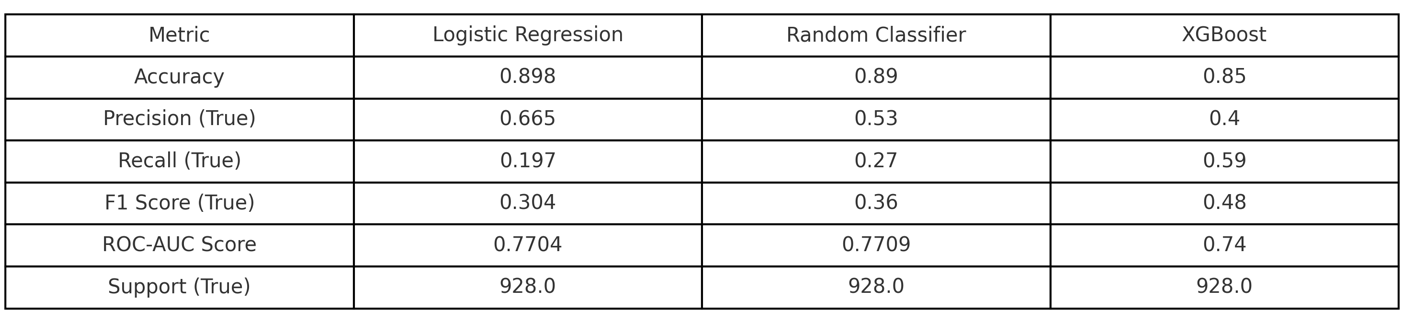

# Observations
## Observations:Logistic Regression had high accuracy but low recall.
## Random Forest improved recall slightly but remained imbalanced
## XGBoost improved performance further.
## XGBoost had the best balance between precision and recall, especially suitable for imbalanced classes

 # Recommendation
 ### Best Model Recommendation:
 ### XGBoost Classifier

# Data Challenges and Applied Techniques Report
 ### Challenges Faced During the Project and Techniques Used ###
## 1. **Missing and Unknown Values**
### - **Challenge** : The dataset had 'unknown' values in categorical features like 'job', 'education','default', 'housing', and 'loan'.
### **Technique Used**: Replaced 'unknown' with 'no_info' for 'default', 'housing', and 'loan' to preserve information and removed columns with high 'unknown' percentages.- **Reason**: Ensures data integrity and avoids misleading the model.
## 2. **Imbalanced Dataset**
### **Challenge**: The target variable was highly imbalanced (more 'no' than 'yes').
### **Technique Used**: Applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the training set.
### **Reason**: Helps the model learn minority class patterns and improves recall/F1-score.
## 3. **Categorical Data Encoding**
### **Challenge**: Many categorical columns required transformation for modeling.
### **Technique Used**: Applied Label Encoding and One-Hot Encoding based on the feature type and model compatibility.
### **Reason**: Encoded variables so models can interpret them without introducing bias.
## 4. **Collinearity in Features**
### **Challenge**: Some numerical features showed high collinearity.
### **Technique Used**: Used correlation heatmap and removed redundant features.
### **Reason**: Reduces multicollinearity and improves model interpretability.
## 5. **Low Recall & F1-Score in Initial Models**
### **Challenge**: Logistic Regression had high accuracy but poor recall.
### **Technique Used**: Tried Random Forest and XGBoost to improve recall.
### **Reason**: Advanced models with SMOTE better captured minority class.
## 6. **Model Selection and Performance Comparison**
### **Challenge**: Choosing the best model for production.
### **Technique Used**: Compared metrics (Accuracy, Precision, Recall, F1, ROC-AUC) across models.
### **Reason**: Ensures selection of a well-balanced and robust model.
 #### The applied data preprocessing and modeling techniques significantly improved the model's ability to identify customers likely to buy the product